# Report: Predicting Product Availability for Nike Fashion Products

## Main Objective
The main goal of this analysis is to explore the availability of Nike fashion products by making accurate predictions about whether items will be in stock or not. We plan to build a model that takes into account various factors like price, color, review count, and average rating, to determine stock status. This information is incredibly valuable for businesses as it helps them manage their inventory more effectively and tailor their marketing strategies. By understanding which products are likely to be in demand, companies can ensure that popular items are always available, ultimately enhancing customer satisfaction.or out of stock based on various product attributes, such as price, color, review count, and average rating. This prediction is valuable for inventory management and marketing strategies, allowing businesses to optimize stock levels, manage demand, and improve customer satisfaction by ensuring popular items remain available.

## Dataset Description
The dataset chosen for this analysis is the Nike Fashion Products Dataset. It contains details about Nike products scraped from the Nike website, including information such as product name, price, color, availability status, reviews, and more. The dataset consists of the following key attributes:
name: The product name.
price: The price of the product.
color: The primary color of the product.
avg_rating: Average customer rating for the product.
review_count: The number of reviews a product has received.
availability: Whether the product is in stock ("InStock") or out of stock ("OutOfStock").
The objective of this analysis is to utilize these features to predict a product's availability using machine learning classification models.

### Data Exploration and Cleaning
The first step involved data exploration to understand the distribution of key variables like price, review_count, and avg_rating, as well as their relationship with availability. Some insights from the initial exploration include:

Prices in the dataset ranged from around $9 to $175.
Only a subset of products had customer ratings and reviews, with missing values in these columns.
Missing values were found in the availability, avg_rating, and review_count columns. Missing availability entries were removed since this is the target variable, and missing ratings and reviews were imputed with 0.
**These are the steps we need to follow:**


1. **Setting up Your Environment**
: You'll need Python installed along with essential libraries. Here's how to install the necessary packages:

In [2]:
%pip install pandas scikit-learn matplotlib seaborn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 648.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ------------------------- ------------ 112.6/167.0 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB 7.9 MB/s eta 0:00:02
   - -------------------------------------- 0.5/11.5 MB 5.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.5 MB 6.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.5 MB 9.6 MB/s eta 0:00:02
   --

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\f2py.exe' -> 'c:\\Python312\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2. **Import the Dataset**
: First, load the dataset into a pandas DataFrame. If you have a CSV file or the dataset from Kaggle, you can use the following code:

In [7]:
import pandas as pd
nike_data = pd.read_csv('D:\\projects\\-IBM-Machine-Learning\\nike_data_2022_09.csv')
print(nike_data.head())

                                                 url  \
0  https://www.nike.com/t/dri-fit-team-minnesota-...   
1  https://www.nike.com/t/club-américa-womens-dri...   
2  https://www.nike.com/t/sportswear-swoosh-mens-...   
3  https://www.nike.com/t/dri-fit-one-luxe-big-ki...   
4  https://www.nike.com/t/paris-saint-germain-rep...   

                                      name  \
0  Nike Dri-FIT Team (MLB Minnesota Twins)   
1                             Club América   
2                   Nike Sportswear Swoosh   
3                    Nike Dri-FIT One Luxe   
4    Paris Saint-Germain Repel Academy AWF   

                                           sub_title brand     model  \
0                          Men's Long-Sleeve T-Shirt  Nike  14226571   
1           Women's Nike Dri-FIT Soccer Jersey Dress  Nike  13814665   
2                                     Men's Overalls  Nike  13015648   
3  Big Kids' (Girls') Printed Tights (Extended Size)  Nike  13809796   
4                         

3. **Data Cleaning and Preparation**
: Lastly, handle missing values and transform the target variable into the binary format of availability. Clean up any other feature if necessary.

In [8]:
# Drop rows when the column is missing
nike_data_cleaned = nike_data.dropna(subset=['availability']).copy()

# Availability to binary (1 = InStock, 0 = OutOfStock)
nike_data_cleaned['availability'] = nike_data_cleaned['availability'].map({'InStock': 1, 'OutOfStock': 0})

# Put missing values in avg_rating and review_count to 0
nike_data_cleaned['avg_rating'] = nike_data_cleaned['avg_rating'].fillna(0)
nike_data_cleaned['review_count'] = nike_data_cleaned['review_count'].fillna(0)

# Use a placeholder to fill missing values in color
nike_data_cleaned['color'] = nike_data_cleaned['color'].fillna('Unknown')

# Verify the sanitized data
print(nike_data_cleaned.isnull().sum())


url                 0
name                0
sub_title           0
brand               0
model               0
color               0
price               0
currency            0
availability        0
description         0
raw_description     0
avg_rating          0
review_count        0
images              4
available_sizes    52
uniq_id             0
scraped_at          0
dtype: int64


4. **Exploratory Data Analysis**: You can understand the distributions and relationship between features, such as price versus availability, by visualizing the data.

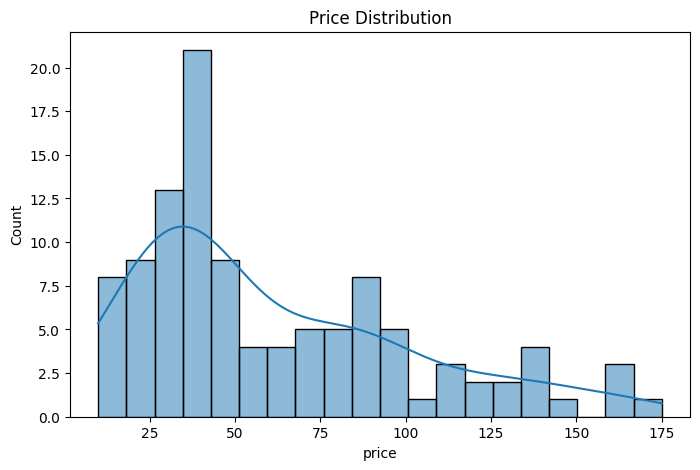

Text(0.5, 1.0, 'Price vs. Availability')

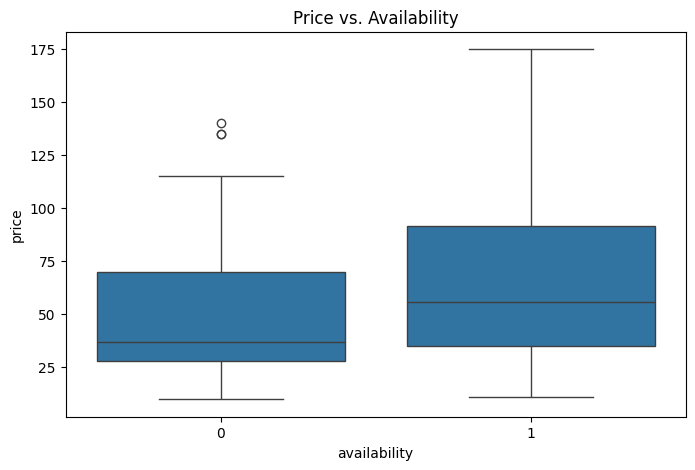

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot price distribution
plt.figure(figsize=(8, 5))
sns.histplot(nike_data_cleaned['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

# AVAILABILITY VS PRICE BOX PLOT
plt.figure(figsize=(8, 5))
sns.boxplot(x='availability', y='price', data=nike_data_cleaned)
plt.title('Price vs. Availability')

## Feature Engineering
Encode categorical variables and prepare features for model training.

In [11]:
# One-hot encode 'color' and other categorical columns if necessary
nike_data_encoded = pd.get_dummies(nike_data_cleaned, columns=['color'], drop_first=True)

# Define feature columns excluding non-relevant ones, such as 'name', 'description',
features = ['price', 'avg_rating', 'review_count'] # Add other relevant features like encoded 'color' columns
X = nike_data_encoded[features]
y = nike_data_encoded['availability']

## Split the data into training and test sets 
This requires splitting the data into a training set and a testing set before training.

In [15]:
from sklearn.model_selection import train_test_split
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train and Test Models
### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Review the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.6060606060606061
              precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
           1       0.62      0.90      0.73        20

    accuracy                           0.61        33
   macro avg       0.56      0.53      0.48        33
weighted avg       0.57      0.61      0.54        33



### Decision Tree Classifer

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Model print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.71      0.75      0.73        20

    accuracy                           0.67        33
   macro avg       0.65      0.64      0.65        33
weighted avg       0.66      0.67      0.66        33



### Random Forest Classifier


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model 
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions 
y_pred_forest = forest_model.predict(X_test)

# Assess the model 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Random Forest Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.65      0.85      0.74        20

    accuracy                           0.64        33
   macro avg       0.61      0.58      0.57        33
weighted avg       0.62      0.64      0.61        33



### Compare Model Performances
For side-by-side comparison of the models' performances, you may create a summary of the key metrics:

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

Let's make a DataFrame to compare results

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_forest)],
    'Precision': [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_tree), precision_score(y_test, y_pred_forest)],
    'Recall': [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_tree), recall_score(y_test, y_pred_forest)],
    'F1 Score': [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_tree), f1_score(y_test, y_pred_forest)]
})

print(comparison_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.606061   0.620690    0.90  0.734694
1        Decision Tree  0.666667   0.714286    0.75  0.731707
2        Random Forest  0.636364   0.653846    0.85  0.739130


## Report Results
Considering the metrics above, if I had to select one model, the recommendation would be Random Forest. It gives the best trade-off precision and recall and includes the highest F1 Score that is combined so that the two metrics are acted on distinctly.

Now, below are the key issues:
- Accuracy: 0.636364
- Accuracy: 0.653846
- Recall 0.85
- F1 Score: 0.739130

This balance makes it a robust choice for general performance, ensuring you do not compromise on any one of these metrics greatly.

##  Key Findings and Insights
- Price was a key driver of product availability. Higher-priced products tended to be more frequently out of stock.
- Review Count also played a role, with products having more reviews often being out of stock, suggesting that popular items with higher customer engagement may sell out quickly.
- Products with higher ratings showed better availability, perhaps that better-rated items are restocked more often.

Overall, the product availability would be reasonably well predicted using the product attributes of price and customer reviews.

## Conclusion/NEXT STEPS
To further develop the model a few improvements could be in order:

1. Other Features: The detailed insights into categories of products-a firm may offer shoes, versus apparels-may contribute to more predictive power.
2. Handling Missing Data: More complete data on the missing ratings and reviews would make the model better on high precision even on new or unrated products.
3. Time series analysis: Inclusion of a time factor would, for instance, check the trend of availability over time, which would be particularly useful for seasonal products.
4.  Optimization to Business: The model can be calibrated to specific business objectives, such as limiting the number of stockouts of high-demand items or equalizing on hand for high-margin item orders.